In [1]:
import datetime
# import time
# import ast
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [2]:
rfile = open('uberData2.txt', 'r')

In [3]:
data = rfile.read()

In [4]:
data = data.split('\n')

In [5]:
# print '# of objects = ' + str(len(data))
# data

# of objects = 2008


In [6]:
dates = []
for el in data:
    end = el.find(':')
    date = el[1:end]
    dates.append(date)

In [11]:
# dates

['datetime.datetime(2016, 1, 24, 11, 0, 0, 36883)',
 'datetime.datetime(2016, 1, 24, 11, 5, 1, 893519)',
 'datetime.datetime(2016, 1, 24, 11, 10, 2, 953438)']

In [7]:
# to make string datetime object
def mod_date(date):
    s = date.find('(')
    e = date.rfind(',')
    just_date = date[s+1:e]
    just_date = just_date.strip().split(',')
    dat = [int(x) for x in just_date]
    return datetime.datetime(dat[0], dat[1], dat[2], dat[3], dat[4], dat[5])

In [8]:
# transform dates array to array of datetime objects
dates = [mod_date(x) for x in dates]

In [14]:
# dates

[datetime.datetime(2016, 1, 24, 11, 0),
 datetime.datetime(2016, 1, 24, 11, 5, 1),
 datetime.datetime(2016, 1, 24, 11, 10, 2)]

In [9]:
# view start and end date and time
print min(dates)
print max(dates)

2016-01-24 13:00:00
2016-01-31 12:58:26


In [10]:
obs = []
for el in data:
    start = el.find(':') + 2
    temp = el[start:-1]
    temp = ast.literal_eval(temp)
    obs.append(temp)

In [20]:
obs[0]['prices']

[{u'currency_code': u'USD',
  u'display_name': u'uberX',
  u'distance': 2.21,
  u'duration': 840,
  u'estimate': u'$24-31',
  u'high_estimate': 31,
  u'localized_display_name': u'uberX',
  u'low_estimate': 24,
  u'minimum': 8,
  u'product_id': u'b8e5c464-5de2-4539-a35a-986d6e58f186',
  u'surge_multiplier': 2},
 {u'currency_code': u'USD',
  u'display_name': u'uberXL',
  u'distance': 2.21,
  u'duration': 840,
  u'estimate': u'$37-47',
  u'high_estimate': 47,
  u'localized_display_name': u'uberXL',
  u'low_estimate': 37,
  u'minimum': 12,
  u'product_id': u'1e0ce2df-4a1e-4333-86dd-dc0c67aaabe1',
  u'surge_multiplier': 2},
 {u'currency_code': u'USD',
  u'display_name': u'uberFAMILY',
  u'distance': 2.21,
  u'duration': 840,
  u'estimate': u'$44-51',
  u'high_estimate': 51,
  u'localized_display_name': u'uberFAMILY',
  u'low_estimate': 44,
  u'minimum': 18,
  u'product_id': u'd6d6d7ad-67f9-43ef-a8de-86bd6224613a',
  u'surge_multiplier': 2},
 {u'currency_code': u'USD',
  u'display_name': u'U

In [11]:
sms = []
for ob in obs:
    smult = ob['prices'][0]['surge_multiplier']
    sms.append(smult)

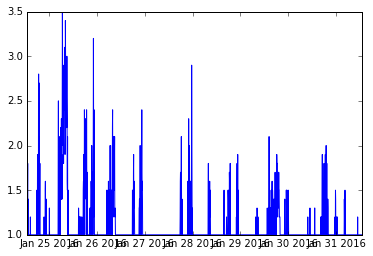

In [12]:
plt.plot(dates, sms)
plt.show()

In [176]:
# for ob in obs:
#     count = 0
#     for price in ob['prices']:
#         if count == 0:
#             surge = price['surge_multiplier']
#             if surge > 1.0:
#                 print surge
#         else:
#             if price['surge_multiplier'] != surge:
#                 print 'surge rates are different at this time between products'
# Effectively telling me when surge occurs, all products(uberX, uberXL, uberBlack, etc. all have same surge rate)

In [13]:
pdfDict = {'date': dates,
           'surge': sms}
pdf = pd.DataFrame(pdfDict)

In [14]:
pdf.head()

,date,surge
0,2016-01-24 13:00:00,1.0
1,2016-01-24 13:05:01,1.0
2,2016-01-24 13:10:02,1.3
3,2016-01-24 13:15:03,1.8
4,2016-01-24 13:20:05,1.0


In [24]:
pdf['dayofweek'] = map(lambda x: x.weekday(), pdf['date'])
# Monday is 0
pdf['dayofmonth'] = map(lambda x: x.day, pdf['date'])
pdf['hourofday'] = map(lambda x: x.hour, pdf['date'])
pdf['minuteofhour'] = map(lambda x: x.minute, pdf['date'])
pdf['minuteofday'] = (pdf['hourofday'] * 60) + pdf['minuteofhour']

                    date  surge  dayofweek  hourofday  minuteofhour  \
0    2016-01-24 13:00:00    1.0          6         13             0   
1    2016-01-24 13:05:01    1.0          6         13             5   
2    2016-01-24 13:10:02    1.3          6         13            10   
3    2016-01-24 13:15:03    1.8          6         13            15   
4    2016-01-24 13:20:05    1.0          6         13            20   
5    2016-01-24 13:25:06    1.0          6         13            25   
6    2016-01-24 13:30:07    1.4          6         13            30   
7    2016-01-24 13:35:09    1.2          6         13            35   
8    2016-01-24 13:40:10    1.0          6         13            40   
9    2016-01-24 13:45:11    1.0          6         13            45   
10   2016-01-24 13:50:12    1.0          6         13            50   
11   2016-01-24 13:55:14    1.0          6         13            55   
12   2016-01-24 14:00:15    1.0          6         14             0   
13   2

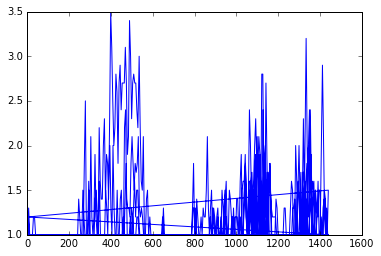

In [25]:
print pdf
plt.plot(pdf['minuteofday'], pdf['surge'])
plt.show()

In [26]:
pdf.to_csv('surge.csv')

In [ ]:
# new pdf will have columns as day of the week. Sunday, Monday, Tuesday, etc...
# the index will be minute of day. 0, 5, 10, 15, etc...
# and then populate each row with approp data for each day of week.
# essentially, each row is the surge rate for that minute of day for each day of the week!